In [2]:
# Do the necessary imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [3]:
# this block only needs to be run once

# from qiskit import IBMQ
# IBMQ.save_account('2295eb6b30c26aecc9b9ecb0677b769a8e3a606479658709d13cd7301349ce07965760ac5eeb2fbb1e9cb741bdfc881058301125aaa6e1a703beedc07bb9db94')

# provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_quito')

In [4]:
# superposition, simulate all vectors in R^n

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [5]:
# diffuser

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

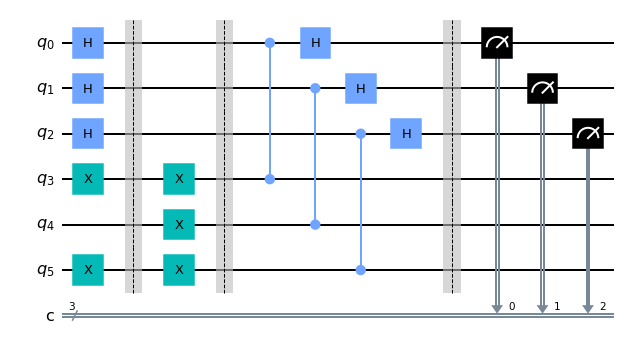

In [16]:
tc = QuantumCircuit(6,3)

#initialize
tc = initialize_s(tc, [0,1,2])
tc.x(3)
tc.x(5)
tc.barrier()

#state preparation
tc.x(3)
tc.x(4)
tc.x(5)
tc.barrier()

#oracle
n_qubit = 3
for i in range(n_qubit):
    tc.cz(i, i+3)
    tc.h(i)
tc.barrier()


tc.measure(0,0)
tc.measure(1,1)
tc.measure(2,2)

tc.draw('mpl')

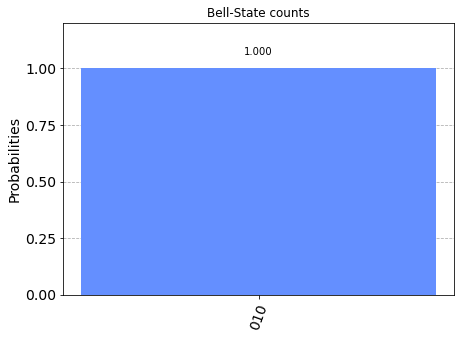

In [17]:
sim = Aer.get_backend('aer_simulator')
tc.save_statevector()

result = sim.run(tc).result()
counts = result.get_counts(tc)
plot_histogram(counts, title='Bell-State counts')